<font color="green">*To start working on this notebook, or any other notebook that we will use in the Moringa Data Science Course, we will need to save our own copy of it. We can do this by clicking File > Save a Copy in Drive. We will then be able to make edits to our own copy of this notebook.*</font>

# Naive Bayes Classification

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> We have been selected to identify whether an email is spam or not

### b) Defining the Metric for Success

This project aims at achieving 80% and above accuracy score after building a naive bayes classifier model 

### c) Understanding the context 

The spambase dataset contains a set of word frequencies occuring in emails. Each email was labelled spam or not spam, denoted as 0 or 1. The spam column is turned into a factor since we are testing binary classification.

### d) Recording the Experimental Design

The Experimental design will include:

* Perform your EDA
* Perform any necessary feature engineering
* Check of multicollinearity
* K-Nearest Neighbours
* Use different test sizes(20%, 30% & 40%)
* Compute accuracy score
* Compute MSE score
* Compute Confusion matrix score

### e) Data Relevance

The dataset provided is relevant to this project

## 2. Reading the Data

In [3]:
## importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# accuracy libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# Loading the Data from the source i.e. csv
# ---

spam = pd.read_csv('spambase.csv', delimiter=',')



## 3. Checking the Data

In [5]:
# Determining the no. of records in our dataset
#
print(spam.shape)

(4601, 58)


In [ ]:
# Previewing the top of our dataset
#
spam.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [ ]:
# Previewing the bottom of our dataset
# 
spam.tail()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [6]:
# Checking whether each column has an appropriate datatype
#
print(spam.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [ ]:
spam.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,0.059824,0.541702,0.093930,0.058626,0.049205,0.248848,0.142586,0.184745,1.662100,0.085577,0.809761,0.121202,0.101645,0.094269,0.549504,0.265384,0.767305,0.124845,0.098915,0.102852,0.064753,0.047048,0.097229,0.047835,0.105412,0.097477,0.136953,0.013201,0.078629,0.064834,0.043667,0.132339,0.046099,0.079196,0.301224,0.179824,0.005444,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,0.201545,0.861698,0.301036,0.335184,0.258843,0.825792,0.444055,0.531122,1.775481,0.509767,1.200810,1.025756,0.350286,0.442636,1.671349,0.886955,3.367292,0.538576,0.593327,0.456682,0.403393,0.328559,0.555907,0.329445,0.532260,0.402623,0.423451,0.220651,0.434672,0.349916,0.361205,0.766819,0.223812,0.621976,1.011687,0.911119,0.076274,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [ ]:
spam['class'].unique()

array([1, 0])

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

An example would be suppose that you're working with a dataset on the population of countries during the year 2016. Validating such information with an external reliable resource such as World Bank Data would be important step to providing credibility to your dataset. Have a look at the following link for an example. [Link](https://rstudio-pubs-static.s3.amazonaws.com/182250_19977d0c5c06403fbad1e653850fc7c6.html).

### a.Validation

## 5. Tidying the Dataset

In [7]:
# Checking for Outliers
#
Q1S = spam.quantile(0.25)
Q3S = spam.quantile(0.75)
IQR_S = Q3S - Q1S
print(IQR_S)

word_freq_make                  0.000
word_freq_address               0.000
word_freq_all                   0.420
word_freq_3d                    0.000
word_freq_our                   0.380
word_freq_over                  0.000
word_freq_remove                0.000
word_freq_internet              0.000
word_freq_order                 0.000
word_freq_mail                  0.160
word_freq_receive               0.000
word_freq_will                  0.800
word_freq_people                0.000
word_freq_report                0.000
word_freq_addresses             0.000
word_freq_free                  0.100
word_freq_business              0.000
word_freq_email                 0.000
word_freq_you                   2.640
word_freq_credit                0.000
word_freq_your                  1.270
word_freq_font                  0.000
word_freq_000                   0.000
word_freq_money                 0.000
word_freq_hp                    0.000
word_freq_hpl                   0.000
word_freq_ge

In [8]:
# Checking for Anomalies
#
spam_outliers = (spam < (Q1S - 1.5 * IQR_S)) | (spam > (Q3S + 1.5 * IQR_S))
print(spam_outliers.any())

word_freq_make                 True
word_freq_address              True
word_freq_all                  True
word_freq_3d                   True
word_freq_our                  True
word_freq_over                 True
word_freq_remove               True
word_freq_internet             True
word_freq_order                True
word_freq_mail                 True
word_freq_receive              True
word_freq_will                 True
word_freq_people               True
word_freq_report               True
word_freq_addresses            True
word_freq_free                 True
word_freq_business             True
word_freq_email                True
word_freq_you                  True
word_freq_credit               True
word_freq_your                 True
word_freq_font                 True
word_freq_000                  True
word_freq_money                True
word_freq_hp                   True
word_freq_hpl                  True
word_freq_george               True
word_freq_650               

In [9]:
# removing the outliers
from scipy import stats
z = np.abs(stats.zscore(spam))

spam_df = spam[(z < 3).all(axis=1)]
print(spam.shape)
print(spam_df.shape)

(4601, 58)
(2185, 58)


In [10]:
# checking or missing values
spam_df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [11]:
# checking for duplicated values
spam_df.duplicated().any()

True

In [12]:
# dealing with duplicated values
spam_df.drop_duplicates(inplace=True)
spam_df.duplicated().any()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


False

## 6. Exploratory Analysis

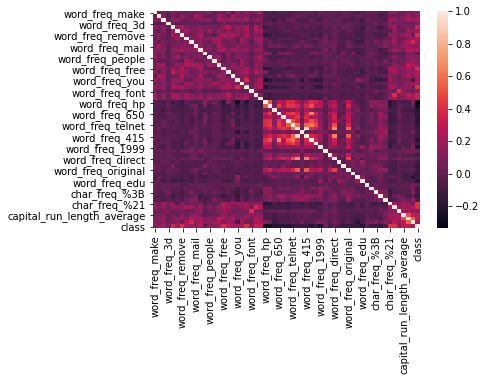

In [13]:
sns.heatmap(spam_df.corr())

In [14]:
# multi-colinearity
#
independent_corr1 = spam_df.corr()
independent_corr1

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
word_freq_make,1.000000,0.000324,0.084938,0.014619,0.137744,0.059695,0.056104,0.026737,0.077905,0.050291,0.091727,0.086692,0.172708,0.034539,0.050576,0.046353,0.156089,-0.017645,0.162405,0.057893,0.161225,0.066313,0.187049,0.253005,-0.053367,-0.031676,-0.063748,-0.032935,-0.031765,-0.034764,-0.017559,-0.022439,-0.047196,0.012817,0.005274,-0.045979,0.032127,-0.003804,0.011849,0.006015,-0.017581,0.041750,-0.001876,-0.013456,-0.060286,-0.038007,0.033283,0.014291,-0.001505,-0.030132,-0.044052,0.127486,0.153678,0.059851,0.043280,0.090076,0.092168,0.116050
word_freq_address,0.000324,1.000000,0.099040,-0.024104,0.070041,-0.002185,0.144765,0.093136,0.013134,0.234470,0.126848,0.037396,0.003292,0.022175,0.186027,0.131829,-0.006963,0.224225,0.098994,0.072906,0.119372,0.005097,0.009154,0.047309,-0.040487,-0.061547,-0.035560,-0.061104,-0.048889,-0.050084,-0.031996,0.034919,-0.009142,0.004394,-0.039687,-0.033270,-0.017379,-0.006334,-0.002228,-0.004879,-0.028144,0.003781,0.012527,-0.052637,0.020120,-0.002327,-0.012712,-0.019997,-0.032332,-0.060654,-0.049502,0.044788,0.052552,0.030964,0.085480,0.166842,0.074971,0.139950
word_freq_all,0.084938,0.099040,1.000000,0.015028,0.146459,0.144075,0.053445,0.033209,0.080776,0.074331,0.108983,0.084448,0.103569,0.012273,0.205424,0.151252,0.132405,0.168114,0.159683,0.111487,0.171073,0.033110,0.148223,0.133056,-0.072401,-0.046073,-0.115267,-0.020130,-0.071076,0.008487,0.039923,-0.051279,-0.056682,-0.055416,0.000343,-0.032856,-0.078509,0.017712,-0.021906,-0.004806,0.013939,-0.046709,-0.023717,-0.064344,-0.037305,-0.096820,0.034363,-0.012480,-0.022002,-0.052872,-0.068321,0.202965,0.139285,0.070251,0.090088,0.232588,0.149512,0.240395
word_freq_3d,0.014619,-0.024104,0.015028,1.000000,0.031711,-0.012624,0.003181,-0.000892,0.025238,0.005962,-0.011542,-0.029210,0.018517,-0.004957,-0.014655,0.069019,-0.004700,0.013620,-0.000079,0.043540,-0.010901,0.016113,0.003739,0.006998,-0.017440,-0.001621,-0.018994,0.027594,-0.015117,-0.012672,-0.016880,-0.014050,-0.021404,-0.006609,-0.007275,-0.008890,0.014680,0.028803,0.000682,-0.009698,-0.010988,-0.016242,0.019680,-0.014064,-0.031728,-0.023306,-0.004715,-0.008789,0.060889,0.005000,-0.011787,0.095636,0.052756,0.068085,0.040900,0.026267,0.035041,0.068478
word_freq_our,0.137744,0.070041,0.146459,0.031711,1.000000,0.170167,0.229463,0.082347,0.050438,0.076991,0.127571,0.080673,0.089358,0.067057,0.043753,0.171445,0.298282,0.055432,0.162456,0.118879,0.263118,0.018440,0.272875,0.103640,-0.112910,-0.074254,-0.065632,-0.038109,-0.012117,-0.046952,-0.029129,0.015599,-0.038523,0.013117,-0.035459,-0.049315,-0.065364,0.009833,-0.044232,0.041624,-0.053938,0.058716,-0.000253,-0.014201,-0.060963,-0.126835,0.007279,-0.023072,-0.047207,-0.106501,-0.043249,0.124057,0.184875,0.002335,0.068116,0.118038,0.058403,0.377886
word_freq_over,0.059695,-0.002185,0.144075,-0.012624,0.170167,1.000000,0.110271,0.197785,0.078135,0.062404,0.164796,0.058224,0.196831,0.044042,0.154153,0.059027,0.156918,0.050870,0.131765,0.109443,0.205794,-0.002328,0.226148,0.206335,-0.064355,-0.074726,-0.068608,-0.0426

In [15]:
pd.DataFrame(np.linalg.inv(independent_corr1.values), index = independent_corr1.index, columns=independent_corr1.columns)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
word_freq_make,1.206080,-0.003818,-0.003693,-0.005101,-0.059964,0.056605,-0.026404,0.055014,-0.030839,-0.013164,-0.021443,-0.036168,-0.113936,-0.004339,-0.009245,0.034462,-0.069342,0.057214,-0.097921,0.020668,-0.077014,-0.074188,-0.173754,-0.244276,0.066323,-0.001563,0.038515,0.016032,0.001504,0.007969,0.021674,0.363010,0.003879,-0.359637,-0.094180,-0.001164,-0.081245,0.006783,-0.033121,-0.024064,-0.001149,-0.055608,-0.004173,0.007974,0.078052,0.031821,-0.029727,-0.017778,-0.022505,0.005826,0.031174,-0.116315,-0.037894,-0.001424,0.035097,0.013525,-0.006069,0.151751
word_freq_address,-0.003818,1.211135,-0.039749,0.029506,-0.033768,0.074226,-0.036256,-0.049429,0.061503,-0.241186,-0.004921,-0.031907,0.054839,0.003033,-0.098860,-0.053899,0.089727,-0.209702,-0.010293,-0.034576,-0.074594,0.013222,0.055610,0.021211,-0.089590,0.066990,0.019091,0.082549,0.037399,0.027633,0.080440,-0.420864,-0.044012,0.266885,-0.015164,-0.007020,-0.023680,0.024854,0.005801,0.064690,0.007293,-0.034300,-0.034553,0.051662,-0.044900,-0.004318,0.010924,-0.002160,0.016808,0.043597,0.081577,0.052587,-0.000117,-0.018061,0.004672,-0.077690,-0.004441,-0.040127
word_freq_all,-0.003693,-0.039749,1.227511,0.011885,-0.069777,-0.077738,0.123429,0.097109,0.025070,-0.002976,0.033828,-0.071432,-0.017687,0.041993,-0.172115,-0.030712,-0.046639,-0.084938,-0.070314,-0.018478,-0.028168,-0.001213,-0.013764,-0.021283,0.043130,-0.001560,0.080036,-0.002476,0.031218,-0.039496,-0.152880,0.019290,-0.000823,0.094261,-0.011631,0.030222,0.016610,-0.030651,-0.011403,-0.001088,-0.060944,0.025990,-0.039458,0.057212,-0.004719,0.079748,-0.028801,-0.010303,-0.035554,-0.001290,0.041485,-0.150188,-0.018074,-0.027675,0.065001,-0.134813,-0.025500,-0.072432
word_freq_3d,-0.005101,0.029506,0.011885,1.041069,-0.032190,0.010109,0.020185,0.000160,-0.002858,-0.001692,0.043585,0.020369,-0.029798,0.018442,0.032793,-0.052132,0.039483,-0.010676,-0.006549,-0.047202,0.040482,0.037177,0.028844,0.017984,0.004912,0.001404,0.011469,-0.072906,-0.000086,-0.006560,0.009200,0.041697,0.021102,-0.032677,0.026784,0.008528,-0.024251,-0.030913,0.007869,0.037671,0.004002,0.012131,-0.050374,0.007289,0.026362,0.012758,0.009069,0.009079,-0.085611,0.005820,0.019183,-0.073402,-0.031373,-0.085123,0.004460,0.000300,-0.014914,-0.052434
word_freq_our,-0.059964,-0.033768,-0.069777,-0.032190,1.358936,-0.065251,-0.117060,0.034214,0.011419,-0.032199,-0.019462,-0.041023,-0.030126,-0.030932,0.087010,0.001280,-0.215514,0.045740,-0.047155,-0.037936,-0.091765,0.017775,-0.163109,0.094993,0.078455,-0.044846,-0.006004,-0.043778,-0.040956,0.005923,0.014356,-0.103688,-0.039623,0.015837,-0.019310,0.037291,-0.042406,-0.015458,0.037671,-0.001842,0.005850,-0.155499,-0.020677,-0.053245,0.032603,0.053989,-0.009688,-0.013107,0.024890,0.084109,-0.002280,0.057043,-0.014109,0.068125,0.036363,0.013793,0.038013,-0.372846
word_freq_over,0.056605,0.074226,-0.077738,0.010109,-0.065251,1.244138,-0.027209,-0.135521,0.012126,0.007572,-0.059733,-0.000616,-0.122026,0.058547,-0.039649,0.047000,-0.030160,0.018654,-0.063532,-0.022070,-0.115285,0.018627,-0.

There seems to be a very low colinearity between the variables since they are all below 5.

## 7. Implementing the Solution

In [18]:
# Implementing the Solution
# 
X_spam = spam.drop('class', 1)
y_spam = spam['class']


**20% testing sample**

In [19]:
# splitting the data into 80% training data and 20% testing data
X_train, X_test, class_train, class_test = train_test_split(X_spam, y_spam, test_size=0.2, random_state=25)

gaus = GaussianNB()  
model = gaus.fit(X_train, class_train)

# Predicting our test predictors
predicted = model.predict(X_test)
print('accuracy score: ',np.mean(predicted == class_test))
print('MSE: ',mean_squared_error(class_test, predicted))
print('Confusion matrix: ')
print(confusion_matrix(class_test,predicted))

accuracy score:  0.8273615635179153
MSE:  0.17263843648208468
Confusion matrix: 
[[431 146]
 [ 13 331]]


**30% testing sample**

In [ ]:
# splitting the data into 80% training data and 20% testing data
X_train, X_test, class_train, class_test = train_test_split(X_spam, y_spam, test_size=0.3, random_state=25)

gaus = GaussianNB()  
model = gaus.fit(X_train, class_train)

# Predicting our test predictors
predicted = model.predict(X_test)
print('accuracy score: ',np.mean(predicted == class_test))
print('MSE: ',mean_squared_error(class_test, predicted))
print('Confusion matrix: ')
print(confusion_matrix(class_test,predicted))

accuracy score:  0.828978622327791
MSE:  0.171021377672209
Confusion matrix: 
[[575 196]
 [ 20 472]]


**40% testing sample**

In [ ]:
# splitting the data into 80% training data and 20% testing data
X_train, X_test, class_train, class_test = train_test_split(X_spam, y_spam, test_size=0.4, random_state=25)

gaus = GaussianNB()  
model = gaus.fit(X_train, class_train)

# Predicting our test predictors
predicted = model.predict(X_test)
print('accuracy score: ',np.mean(predicted == class_test))
print('MSE: ',mean_squared_error(class_test, predicted))
print('Confusion matrix: ')
print(confusion_matrix(class_test,predicted))

accuracy score:  0.8295724465558195
MSE:  0.17042755344418054
Confusion matrix: 
[[760 258]
 [ 29 637]]


## 8. Challenging the solution

> Removing outliers is not the best solution for this problem since it will lead to low accuracy in prediction. 

> An increase in test size leads to a slight increase in accuracy






## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

yes

### b). Do we need other data to answer our question?

yes

### c). Did we have the right question?

yes